In [1]:
!pip install statsmodels --upgrade

Please upload JPM Excel file


Saving JPM_HistoricalPrices.xlsx to JPM_HistoricalPrices.xlsx
Please upload GS Excel file


Saving GoldS_HistoricalPrices.xlsx to GoldS_HistoricalPrices.xlsx

JPM DataFrame columns: ['Date', ' Open', ' High', ' Low', ' Close', ' Volume']
GS DataFrame columns: ['Date', ' Open', ' High', ' Low', ' Close', ' Volume']
Please enter the column name containing closing prices:  Close

Unit Root Tests for JPM:
ADF Test:
ADF Statistic: -0.8444
p-value: 0.8057
Critical Values: {'1%': -3.4514843502727306, '5%': -2.8708485956333556, '10%': -2.571729625657462}

KPSS Test:
KPSS Statistic: 2.4945
p-value: 0.0100
Critical Values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}

Unit Root Tests for GS:
ADF Test:
ADF Statistic: -0.6567
p-value: 0.8577
Critical Values: {'1%': -3.4514162625887037, '5%': -2.8708187088091406, '10%': -2.5717136883095675}

KPSS Test:
KPSS Statistic: 2.5770
p-value: 0.0100
Critical Values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}


<ipython-input-3-b439cb630fbb>:55: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_result = kpss(series)
<ipython-input-3-b439cb630fbb>:55: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_result = kpss(series)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._


Best ARMA model for JPM:
Order: (3, 0, 3)
AIC: 1585.88


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of


Best ARMA model for GS:
Order: (1, 0, 2)
AIC: 2209.65


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



Johansen Cointegration Test:
Trace statistic: [10.17199619  0.71811032]
Critical values (90%, 95%, 99%): [[13.4294 15.4943 19.9349]
 [ 2.7055  3.8415  6.6349]]
r = 0: No cointegration at 95% confidence level
r = 1: No cointegration at 95% confidence level


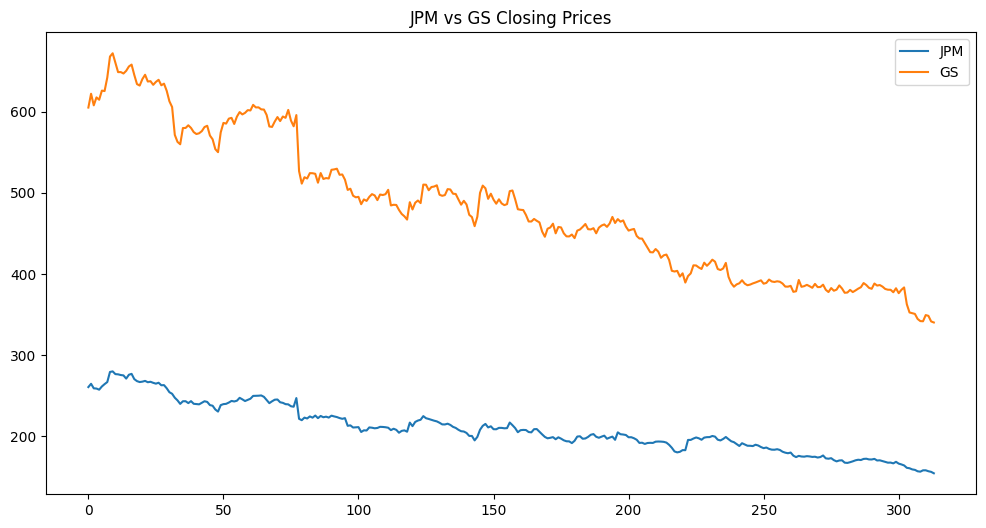

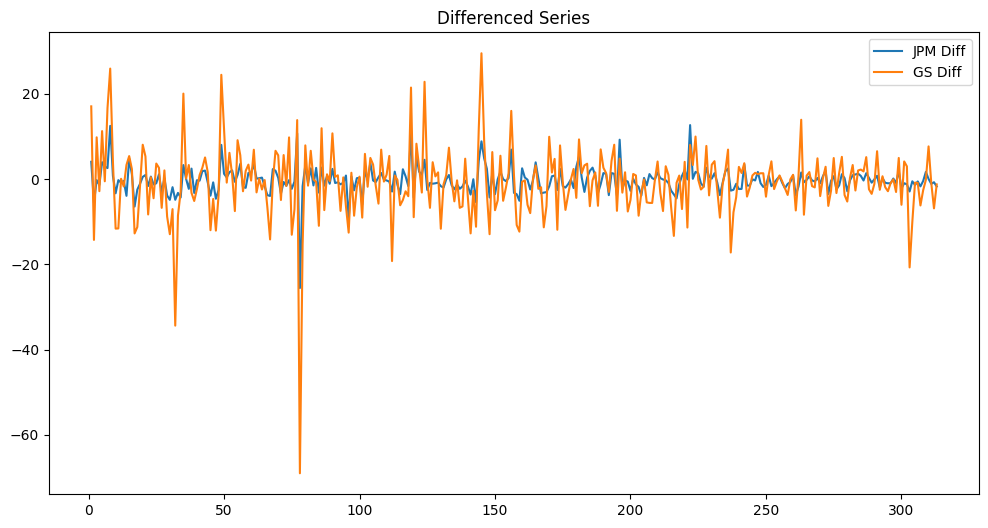

In [3]:
# Import required libraries
import pandas as pd
import numpy as np
from google.colab import files
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.vector_ar.vecm import coint_johansen
import matplotlib.pyplot as plt

# Upload Excel files
print("Please upload JPM Excel file")
jpm_upload = files.upload()
jpm_filename = list(jpm_upload.keys())[0]
jpm_df = pd.read_excel(jpm_filename)

print("Please upload GS Excel file")
gs_upload = files.upload()
gs_filename = list(gs_upload.keys())[0]
gs_df = pd.read_excel(gs_filename)

# Print available columns
print("\nJPM DataFrame columns:", list(jpm_df.columns))
print("GS DataFrame columns:", list(gs_df.columns))

# Ask user for the correct column name
close_column = input("Please enter the column name containing closing prices: ")

# Extract closing prices using user-specified column name
try:
    jpm_close = jpm_df[close_column]
    gs_close = gs_df[close_column]
except KeyError:
    print(f"Error: Column '{close_column}' not found in one or both DataFrames")
    print("Please check the column names and try again")
    raise

# Ensure both series have the same length
min_length = min(len(jpm_close), len(gs_close))
jpm_close = jpm_close[:min_length]
gs_close = gs_close[:min_length]

# Function for unit root tests
def unit_root_tests(series, name):
    print(f"\nUnit Root Tests for {name}:")

    # ADF Test
    adf_result = adfuller(series)
    print("ADF Test:")
    print(f'ADF Statistic: {adf_result[0]:.4f}')
    print(f'p-value: {adf_result[1]:.4f}')
    print(f'Critical Values: {adf_result[4]}')

    # KPSS Test
    kpss_result = kpss(series)
    print("\nKPSS Test:")
    print(f'KPSS Statistic: {kpss_result[0]:.4f}')
    print(f'p-value: {kpss_result[1]:.4f}')
    print(f'Critical Values: {kpss_result[3]}')

# Perform unit root tests
unit_root_tests(jpm_close, "JPM")
unit_root_tests(gs_close, "GS")

# Difference the series if non-stationary
jpm_diff = jpm_close.diff().dropna()
gs_diff = gs_close.diff().dropna()

# Function to find best ARMA model (using ARIMA with d=0)
def find_best_arma(series, name, max_p=3, max_q=3):
    best_aic = float('inf')
    best_order = None

    for p in range(max_p + 1):
        for q in range(max_q + 1):
            try:
                model = ARIMA(series, order=(p, 0, q))
                results = model.fit()
                if results.aic < best_aic:
                    best_aic = results.aic
                    best_order = (p, 0, q)
            except:
                continue

    print(f"\nBest ARMA model for {name}:")
    print(f"Order: {best_order}")
    print(f"AIC: {best_aic:.2f}")

    best_model = ARIMA(series, order=best_order).fit()
    return best_model

# Fit ARMA models
jpm_arma = find_best_arma(jpm_diff, "JPM")
gs_arma = find_best_arma(gs_diff, "GS")

# Cointegration test
def cointegration_test(df):
    result = coint_johansen(df, det_order=0, k_ar_diff=1)
    print("\nJohansen Cointegration Test:")
    print(f"Trace statistic: {result.lr1}")
    print(f"Critical values (90%, 95%, 99%): {result.cvt}")

    for i in range(len(result.lr1)):
        if result.lr1[i] > result.cvt[i, 1]:  # 95% critical value
            print(f"r = {i}: Cointegration exists at 95% confidence level")
        else:
            print(f"r = {i}: No cointegration at 95% confidence level")

# Prepare data for cointegration
coint_df = pd.DataFrame({
    'JPM': jpm_close,
    'GS': gs_close
}).dropna()

# Run cointegration test
cointegration_test(coint_df)

# Plot the series
plt.figure(figsize=(12,6))
plt.plot(jpm_close, label='JPM')
plt.plot(gs_close, label='GS')
plt.title('JPM vs GS Closing Prices')
plt.legend()
plt.show()

# Plot the differenced series
plt.figure(figsize=(12,6))
plt.plot(jpm_diff, label='JPM Diff')
plt.plot(gs_diff, label='GS Diff')
plt.title('Differenced Series')
plt.legend()
plt.show()

Please upload JPM Excel file


Saving JPM_HistoricalPrices.xlsx to JPM_HistoricalPrices (1).xlsx
Please upload GS Excel file


Saving GoldS_HistoricalPrices.xlsx to GoldS_HistoricalPrices (1).xlsx

JPM DataFrame columns: ['Date', ' Open', ' High', ' Low', ' Close', ' Volume']
GS DataFrame columns: ['Date', ' Open', ' High', ' Low', ' Close', ' Volume']
Please enter the column name containing closing prices:  Close

Unit Root Tests for JPM:
ADF Test:
ADF Statistic: -0.8444
p-value: 0.8057
Critical Values: {'1%': -3.4514843502727306, '5%': -2.8708485956333556, '10%': -2.571729625657462}

KPSS Test:
KPSS Statistic: 2.4945
p-value: 0.0100
Critical Values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}

Unit Root Tests for GS:
ADF Test:
ADF Statistic: -0.6567
p-value: 0.8577
Critical Values: {'1%': -3.4514162625887037, '5%': -2.8708187088091406, '10%': -2.5717136883095675}

KPSS Test:
KPSS Statistic: 2.5770
p-value: 0.0100
Critical Values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}

Johansen Cointegration Test:
Trace statistic: [10.17199619  0.71811032]
Critical values (90%, 95%, 99%): [[13.42

<ipython-input-4-38659dc01725>:55: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_result = kpss(series)
<ipython-input-4-38659dc01725>:55: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_result = kpss(series)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/sta


Best ARIMA model for JPM:
Order: (2, 2, 3)
AIC: 1590.85


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:60


Best ARIMA model for GS:
Order: (0, 2, 1)
AIC: 2213.46


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


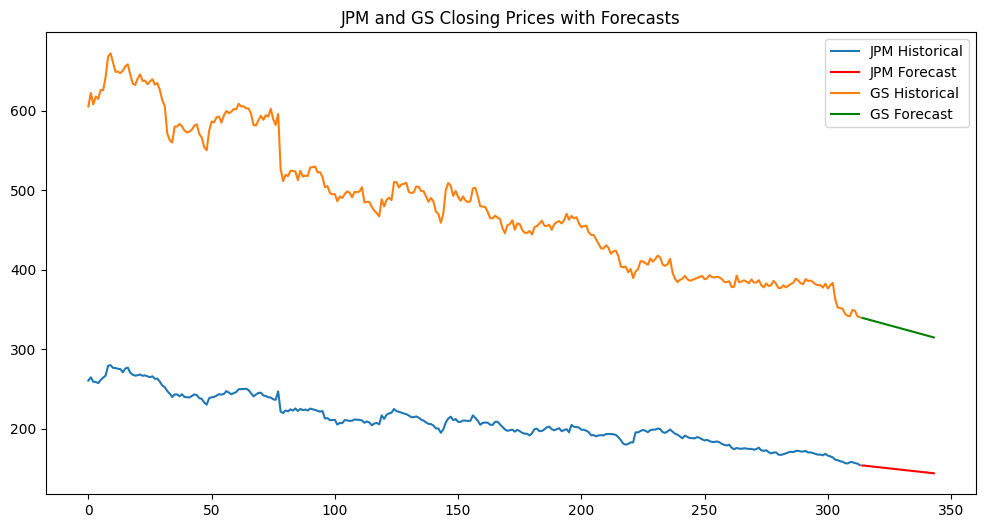

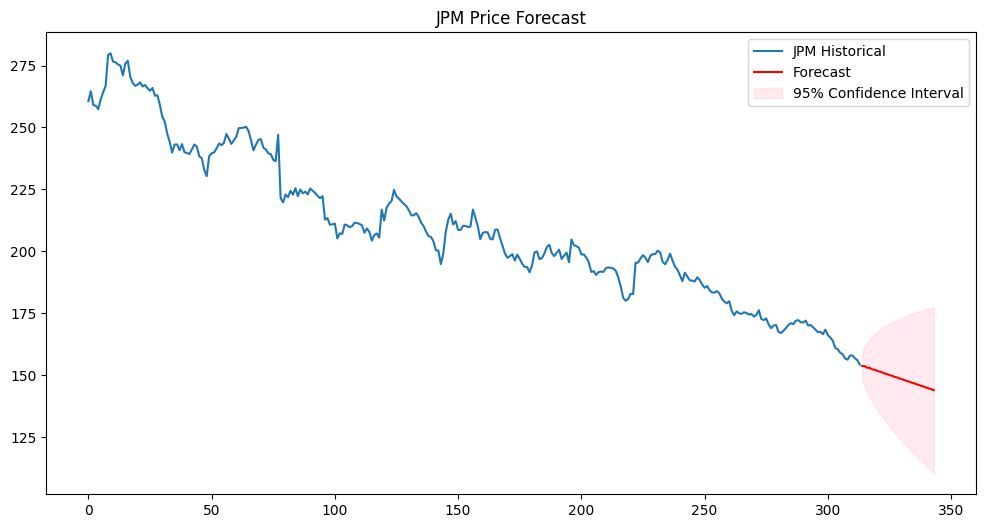

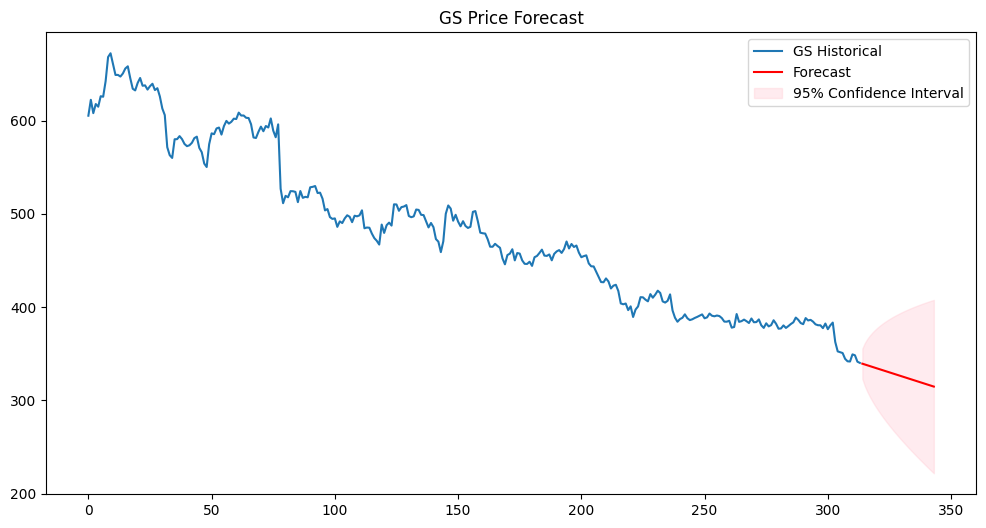


JPM Forecast Values (next 5 periods):
314    153.742544
315    153.672980
316    153.056731
317    152.972119
318    152.416109
Name: predicted_mean, dtype: float64

GS Forecast Values (next 5 periods):
314    339.413482
315    338.566965
316    337.720447
317    336.873929
318    336.027412
Name: predicted_mean, dtype: float64


In [4]:
# Import required libraries
import pandas as pd
import numpy as np
from google.colab import files
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.vector_ar.vecm import coint_johansen
import matplotlib.pyplot as plt

# Upload Excel files
print("Please upload JPM Excel file")
jpm_upload = files.upload()
jpm_filename = list(jpm_upload.keys())[0]
jpm_df = pd.read_excel(jpm_filename)

print("Please upload GS Excel file")
gs_upload = files.upload()
gs_filename = list(gs_upload.keys())[0]
gs_df = pd.read_excel(gs_filename)

# Print available columns
print("\nJPM DataFrame columns:", list(jpm_df.columns))
print("GS DataFrame columns:", list(gs_df.columns))

# Ask user for the correct column name
close_column = input("Please enter the column name containing closing prices: ")

# Extract closing prices using user-specified column name
try:
    jpm_close = jpm_df[close_column]
    gs_close = gs_df[close_column]
except KeyError:
    print(f"Error: Column '{close_column}' not found in one or both DataFrames")
    print("Please check the column names and try again")
    raise

# Ensure both series have the same length
min_length = min(len(jpm_close), len(gs_close))
jpm_close = jpm_close[:min_length]
gs_close = gs_close[:min_length]

# Function for unit root tests
def unit_root_tests(series, name):
    print(f"\nUnit Root Tests for {name}:")

    # ADF Test
    adf_result = adfuller(series)
    print("ADF Test:")
    print(f'ADF Statistic: {adf_result[0]:.4f}')
    print(f'p-value: {adf_result[1]:.4f}')
    print(f'Critical Values: {adf_result[4]}')

    # KPSS Test
    kpss_result = kpss(series)
    print("\nKPSS Test:")
    print(f'KPSS Statistic: {kpss_result[0]:.4f}')
    print(f'p-value: {kpss_result[1]:.4f}')
    print(f'Critical Values: {kpss_result[3]}')

# Perform unit root tests
unit_root_tests(jpm_close, "JPM")
unit_root_tests(gs_close, "GS")

# Cointegration test
def cointegration_test(df):
    result = coint_johansen(df, det_order=0, k_ar_diff=1)
    print("\nJohansen Cointegration Test:")
    print(f"Trace statistic: {result.lr1}")
    print(f"Critical values (90%, 95%, 99%): {result.cvt}")

    for i in range(len(result.lr1)):
        if result.lr1[i] > result.cvt[i, 1]:
            print(f"r = {i}: Cointegration exists at 95% confidence level")
        else:
            print(f"r = {i}: No cointegration at 95% confidence level")

# Prepare data for cointegration
coint_df = pd.DataFrame({
    'JPM': jpm_close,
    'GS': gs_close
}).dropna()
cointegration_test(coint_df)

# Function to find best ARIMA model
def find_best_arima(series, name, max_p=3, max_d=2, max_q=3):
    best_aic = float('inf')
    best_order = None

    for p in range(max_p + 1):
        for d in range(max_d + 1):
            for q in range(max_q + 1):
                try:
                    model = ARIMA(series, order=(p, d, q))
                    results = model.fit()
                    if results.aic < best_aic:
                        best_aic = results.aic
                        best_order = (p, d, q)
                except:
                    continue

    print(f"\nBest ARIMA model for {name}:")
    print(f"Order: {best_order}")
    print(f"AIC: {best_aic:.2f}")
    return best_order

# Find and fit best ARIMA models
jpm_order = find_best_arima(jpm_close, "JPM")
gs_order = find_best_arima(gs_close, "GS")

# Fit final ARIMA models
jpm_model = ARIMA(jpm_close, order=jpm_order).fit()
gs_model = ARIMA(gs_close, order=gs_order).fit()

# Forecast next 30 periods
forecast_steps = 30
jpm_forecast = jpm_model.forecast(steps=forecast_steps)
gs_forecast = gs_model.forecast(steps=forecast_steps)

# Create forecast index (assuming daily data)
last_index = len(jpm_close) - 1
forecast_index = range(last_index + 1, last_index + 1 + forecast_steps)

# Plot original series with forecasts
plt.figure(figsize=(12,6))
plt.plot(jpm_close, label='JPM Historical')
plt.plot(forecast_index, jpm_forecast, label='JPM Forecast', color='red')
plt.plot(gs_close, label='GS Historical')
plt.plot(forecast_index, gs_forecast, label='GS Forecast', color='green')
plt.title('JPM and GS Closing Prices with Forecasts')
plt.legend()
plt.show()

# Plot detailed forecast with confidence intervals
def plot_forecast(model, series, name, steps=30):
    forecast_obj = model.get_forecast(steps=steps)
    forecast = forecast_obj.predicted_mean
    conf_int = forecast_obj.conf_int()

    forecast_index = range(len(series), len(series) + steps)

    plt.figure(figsize=(12,6))
    plt.plot(series, label=f'{name} Historical')
    plt.plot(forecast_index, forecast, label='Forecast', color='red')
    plt.fill_between(forecast_index,
                    conf_int.iloc[:, 0],
                    conf_int.iloc[:, 1],
                    color='pink',
                    alpha=0.3,
                    label='95% Confidence Interval')
    plt.title(f'{name} Price Forecast')
    plt.legend()
    plt.show()

# Generate detailed forecast plots
plot_forecast(jpm_model, jpm_close, "JPM")
plot_forecast(gs_model, gs_close, "GS")

# Print forecast values
print("\nJPM Forecast Values (next 5 periods):")
print(jpm_forecast[:5])
print("\nGS Forecast Values (next 5 periods):")
print(gs_forecast[:5])

Please upload JPM Excel file


Saving JPM_HistoricalPrices.xlsx to JPM_HistoricalPrices (2).xlsx
Please upload GS Excel file


Saving GoldS_HistoricalPrices.xlsx to GoldS_HistoricalPrices (2).xlsx

JPM DataFrame columns: ['Date', ' Open', ' High', ' Low', ' Close', ' Volume']
GS DataFrame columns: ['Date', ' Open', ' High', ' Low', ' Close', ' Volume']
Please enter the column name containing closing prices:  Close

Unit Root Tests for JPM:
ADF Test:
ADF Statistic: -0.8444
p-value: 0.8057
Critical Values: {'1%': -3.4514843502727306, '5%': -2.8708485956333556, '10%': -2.571729625657462}
Interpretation:
  - p-value >= 0.05: Fail to reject null - JPM may be non-stationary

KPSS Test:
KPSS Statistic: 2.4945
p-value: 0.0100
Critical Values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}
Interpretation:
  - p-value < 0.05: Reject null hypothesis - JPM is non-stationary

Unit Root Tests for GS:
ADF Test:
ADF Statistic: -0.6567
p-value: 0.8577
Critical Values: {'1%': -3.4514162625887037, '5%': -2.8708187088091406, '10%': -2.5717136883095675}
Interpretation:
  - p-value >= 0.05: Fail to reject null - GS may be 

<ipython-input-5-68fa55efb5d8>:60: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_result = kpss(series)
<ipython-input-5-68fa55efb5d8>:60: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_result = kpss(series)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/sta


Best ARIMA model for JPM:
Order: (2, 2, 3)
AIC: 1590.85
Interpretation:
  - p=2: 2 autoregressive term(s)
  - d=2: 2 difference(s) needed for stationarity
  - q=3: 3 moving average term(s)


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:60


Best ARIMA model for GS:
Order: (0, 2, 1)
AIC: 2213.46
Interpretation:
  - p=0: 0 autoregressive term(s)
  - d=2: 2 difference(s) needed for stationarity
  - q=1: 1 moving average term(s)


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


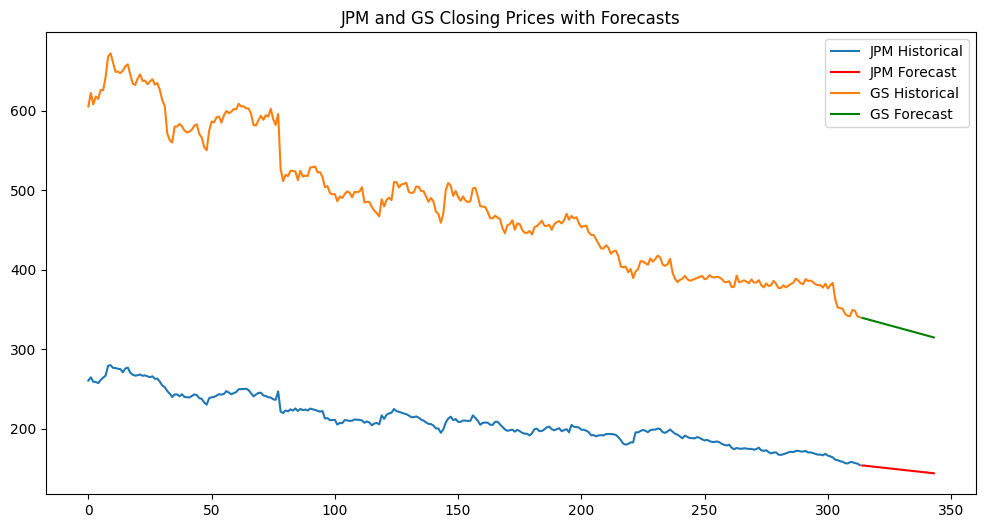

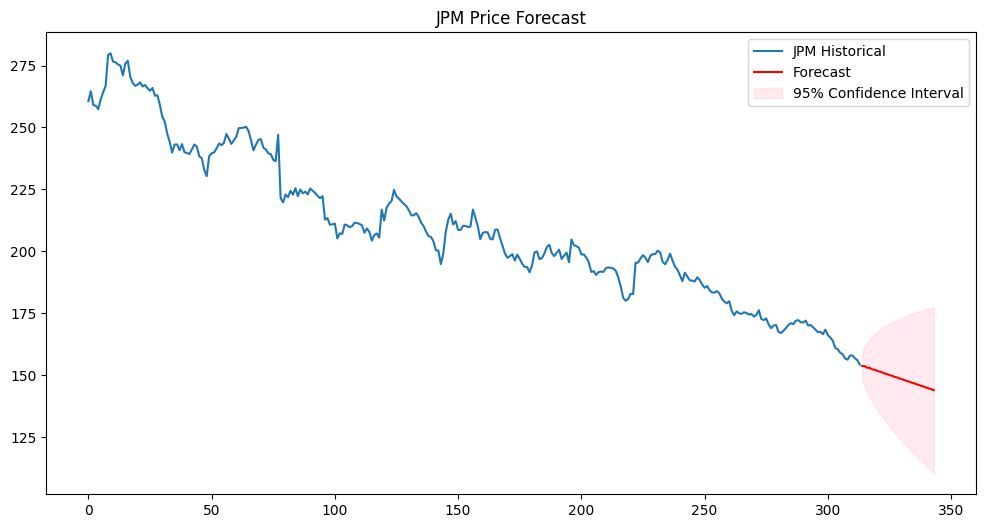


Forecast Interpretation for JPM:
Last observed value: 154.32
Average forecast value: 148.94
Forecast change: -5.38
Trend: Downward forecast trend
95% CI range at period 30: [110.46, 177.54]


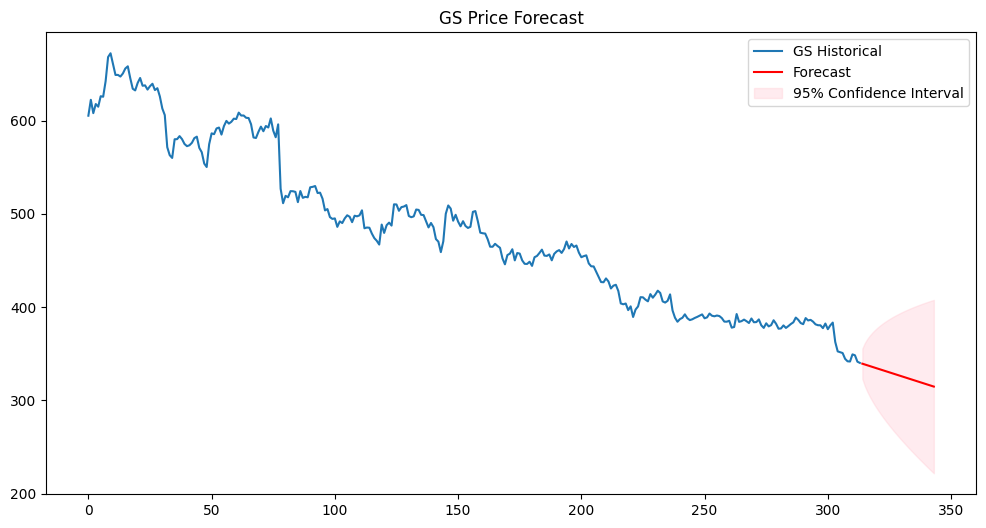


Forecast Interpretation for GS:
Last observed value: 340.26
Average forecast value: 327.14
Forecast change: -13.12
Trend: Downward forecast trend
95% CI range at period 30: [221.93, 407.80]

JPM Forecast Values (next 5 periods):
314    153.742544
315    153.672980
316    153.056731
317    152.972119
318    152.416109
Name: predicted_mean, dtype: float64

GS Forecast Values (next 5 periods):
314    339.413482
315    338.566965
316    337.720447
317    336.873929
318    336.027412
Name: predicted_mean, dtype: float64


In [5]:
# Import required libraries
import pandas as pd
import numpy as np
from google.colab import files
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.vector_ar.vecm import coint_johansen
import matplotlib.pyplot as plt

# Upload Excel files
print("Please upload JPM Excel file")
jpm_upload = files.upload()
jpm_filename = list(jpm_upload.keys())[0]
jpm_df = pd.read_excel(jpm_filename)

print("Please upload GS Excel file")
gs_upload = files.upload()
gs_filename = list(gs_upload.keys())[0]
gs_df = pd.read_excel(gs_filename)

# Print available columns
print("\nJPM DataFrame columns:", list(jpm_df.columns))
print("GS DataFrame columns:", list(gs_df.columns))

# Ask user for the correct column name
close_column = input("Please enter the column name containing closing prices: ")

# Extract closing prices using user-specified column name
try:
    jpm_close = jpm_df[close_column]
    gs_close = gs_df[close_column]
except KeyError:
    print(f"Error: Column '{close_column}' not found in one or both DataFrames")
    print("Please check the column names and try again")
    raise

# Ensure both series have the same length
min_length = min(len(jpm_close), len(gs_close))
jpm_close = jpm_close[:min_length]
gs_close = gs_close[:min_length]

# Function for unit root tests with interpretation
def unit_root_tests(series, name):
    print(f"\nUnit Root Tests for {name}:")

    # ADF Test
    adf_result = adfuller(series)
    print("ADF Test:")
    print(f'ADF Statistic: {adf_result[0]:.4f}')
    print(f'p-value: {adf_result[1]:.4f}')
    print(f'Critical Values: {adf_result[4]}')
    print("Interpretation:")
    if adf_result[1] < 0.05:
        print(f"  - p-value < 0.05: Reject null hypothesis - {name} is stationary")
    else:
        print(f"  - p-value >= 0.05: Fail to reject null - {name} may be non-stationary")

    # KPSS Test
    kpss_result = kpss(series)
    print("\nKPSS Test:")
    print(f'KPSS Statistic: {kpss_result[0]:.4f}')
    print(f'p-value: {kpss_result[1]:.4f}')
    print(f'Critical Values: {kpss_result[3]}')
    print("Interpretation:")
    if kpss_result[1] < 0.05:
        print(f"  - p-value < 0.05: Reject null hypothesis - {name} is non-stationary")
    else:
        print(f"  - p-value >= 0.05: Fail to reject null - {name} may be stationary")

# Perform unit root tests
unit_root_tests(jpm_close, "JPM")
unit_root_tests(gs_close, "GS")

# Cointegration test with interpretation
def cointegration_test(df):
    result = coint_johansen(df, det_order=0, k_ar_diff=1)
    print("\nJohansen Cointegration Test:")
    print(f"Trace statistic: {result.lr1}")
    print(f"Critical values (90%, 95%, 99%): {result.cvt}")
    print("Interpretation:")
    for i in range(len(result.lr1)):
        if result.lr1[i] > result.cvt[i, 1]:
            print(f"  - r = {i}: Cointegration exists at 95% confidence level")
            print(f"    Trace statistic ({result.lr1[i]:.2f}) > 95% critical value ({result.cvt[i, 1]:.2f})")
        else:
            print(f"  - r = {i}: No cointegration at 95% confidence level")
            print(f"    Trace statistic ({result.lr1[i]:.2f}) <= 95% critical value ({result.cvt[i, 1]:.2f})")
    if result.lr1[0] > result.cvt[0, 1]:
        print("Conclusion: JPM and GS are cointegrated - they share a long-run equilibrium relationship")
    else:
        print("Conclusion: No evidence of cointegration between JPM and GS")

# Prepare data for cointegration
coint_df = pd.DataFrame({
    'JPM': jpm_close,
    'GS': gs_close
}).dropna()
cointegration_test(coint_df)

# Function to find best ARIMA model with interpretation
def find_best_arima(series, name, max_p=3, max_d=2, max_q=3):
    best_aic = float('inf')
    best_order = None

    for p in range(max_p + 1):
        for d in range(max_d + 1):
            for q in range(max_q + 1):
                try:
                    model = ARIMA(series, order=(p, d, q))
                    results = model.fit()
                    if results.aic < best_aic:
                        best_aic = results.aic
                        best_order = (p, d, q)
                except:
                    continue

    print(f"\nBest ARIMA model for {name}:")
    print(f"Order: {best_order}")
    print(f"AIC: {best_aic:.2f}")
    print("Interpretation:")
    print(f"  - p={best_order[0]}: {best_order[0]} autoregressive term(s)")
    print(f"  - d={best_order[1]}: {best_order[1]} difference(s) needed for stationarity")
    print(f"  - q={best_order[2]}: {best_order[2]} moving average term(s)")
    return best_order

# Find and fit best ARIMA models
jpm_order = find_best_arima(jpm_close, "JPM")
gs_order = find_best_arima(gs_close, "GS")

# Fit final ARIMA models
jpm_model = ARIMA(jpm_close, order=jpm_order).fit()
gs_model = ARIMA(gs_close, order=gs_order).fit()

# Forecast next 30 periods
forecast_steps = 30
jpm_forecast = jpm_model.forecast(steps=forecast_steps)
gs_forecast = gs_model.forecast(steps=forecast_steps)

# Create forecast index
last_index = len(jpm_close) - 1
forecast_index = range(last_index + 1, last_index + 1 + forecast_steps)

# Plot original series with forecasts
plt.figure(figsize=(12,6))
plt.plot(jpm_close, label='JPM Historical')
plt.plot(forecast_index, jpm_forecast, label='JPM Forecast', color='red')
plt.plot(gs_close, label='GS Historical')
plt.plot(forecast_index, gs_forecast, label='GS Forecast', color='green')
plt.title('JPM and GS Closing Prices with Forecasts')
plt.legend()
plt.show()

# Detailed forecast plot with confidence intervals and interpretation
def plot_forecast(model, series, name, steps=30):
    forecast_obj = model.get_forecast(steps=steps)
    forecast = forecast_obj.predicted_mean
    conf_int = forecast_obj.conf_int()

    forecast_index = range(len(series), len(series) + steps)

    plt.figure(figsize=(12,6))
    plt.plot(series, label=f'{name} Historical')
    plt.plot(forecast_index, forecast, label='Forecast', color='red')
    plt.fill_between(forecast_index,
                    conf_int.iloc[:, 0],
                    conf_int.iloc[:, 1],
                    color='pink',
                    alpha=0.3,
                    label='95% Confidence Interval')
    plt.title(f'{name} Price Forecast')
    plt.legend()
    plt.show()

    # Forecast interpretation
    last_value = series.iloc[-1]
    mean_forecast = forecast.mean()
    print(f"\nForecast Interpretation for {name}:")
    print(f"Last observed value: {last_value:.2f}")
    print(f"Average forecast value: {mean_forecast:.2f}")
    print(f"Forecast change: {mean_forecast - last_value:.2f}")
    if mean_forecast > last_value:
        print("Trend: Upward forecast trend")
    elif mean_forecast < last_value:
        print("Trend: Downward forecast trend")
    else:
        print("Trend: Flat forecast trend")
    print(f"95% CI range at period {steps}: [{conf_int.iloc[-1, 0]:.2f}, {conf_int.iloc[-1, 1]:.2f}]")

# Generate detailed forecast plots and interpretations
plot_forecast(jpm_model, jpm_close, "JPM")
plot_forecast(gs_model, gs_close, "GS")

# Print forecast values
print("\nJPM Forecast Values (next 5 periods):")
print(jpm_forecast[:5])
print("\nGS Forecast Values (next 5 periods):")
print(gs_forecast[:5])